# Análisis Exploratorio de Datos (EDA) - Solicitudes de Crédito

En este notebook realizamos la exploración inicial de los datos de solicitudes de crédito para entender el perfil de los clientes y preparar la base para el modelado.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

apps = pd.read_csv('data/raw/applications.csv', parse_dates=['orig_month'], thousands=',')



In [27]:
apps.columns = apps.columns.str.strip().str.lower()
apps.isna().sum().to_frame(name='nulos')

,nulos
customer_id,0
orig_month,0
age,0
income,750
debt_income,0
bureau_score,0
utilization,0
prev_delin_24m,0
tenure_months,0
product,0


In [28]:

apps['income'] = apps['income'].fillna(apps['income'].median())
apps

,customer_id,orig_month,age,income,debt_income,bureau_score,utilization,prev_delin_24m,tenure_months,product,channel,region,amount,term_months,unemp,rate,infl
0,1,2025-01-04,38,23422.33,0.6224,703.1,0.0894,0,35,PL,Partner,C,72728.28,18,4.495141,7.538432,4.619724
1,2,2024-01-03,34,103244.98,0.3936,691.9,0.1771,1,17,PL,Partner,C,45248.85,18,4.335648,7.375842,4.507775
2,3,2024-01-05,31,41568.33,0.5023,653.2,0.4781,0,68,AUTO,Digital,C,308801.45,12,4.661799,7.384582,4.868222
3,4,2025-01-02,21,16828.33,0.2190,642.4,0.6044,0,6,CC,Digital,C,26607.87,12,4.404924,7.608611,4.481929
4,5,2024-01-01,50,12633.20,0.1435,681.7,0.1931,0,40,PL,Digital,C,92093.10,18,3.984339,7.382953,4.249541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,2023-01-07,38,30300.98,0.2434,721.2,0.6266,1,3,CC,Partner,S,46228.76,12,4.336626,7.137931,4.360457
24996,24997,2025-01-06,52,42532.54,0.1715,577.6,0.8343,0,70,PL,Branch,C,23117.97,36,4.652507,7.532933,4.679545
24997,24998,2024-01-06,50,19879.46,0.4391,533.4,0.3975,0,15,PL,Digital,S,33748.71,24,4.718611,7.444711,4.886401
24998,24999,2023-01-12,28,73333.48,0.4367,652.5,0.5162,0,63,CC,Branch,C,25797.25,12,3.931778,7.323930,4.388643


In [29]:
apps.duplicated().sum()


np.int64(0)

In [30]:
apps.describe()


,customer_id,orig_month,age,income,debt_income,bureau_score,utilization,prev_delin_24m,tenure_months,amount,term_months,unemp,rate,infl
count,25000.000000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,2023-04-21 17:12:01.152000,36.027760,33644.874963,0.367154,680.128736,0.399311,0.348880,39.674680,68266.756598,18.913920,4.260774,7.322589,4.444563
min,1.000000,2022-01-01 00:00:00,18.000000,12000.000000,0.007500,472.300000,0.003600,0.000000,1.000000,7014.630000,12.000000,3.787653,6.886504,4.074260
25%,6250.750000,2022-01-11 00:00:00,30.000000,21576.482500,0.220800,642.800000,0.243300,0.000000,20.000000,31246.240000,12.000000,3.983684,7.176234,4.278983
50%,12500.500000,2023-01-10 00:00:00,36.000000,29824.790000,0.337300,679.800000,0.384250,0.000000,34.000000,49235.295000,18.000000,4.238974,7.325822,4.445671
75%,18750.250000,2024-01-08 00:00:00,42.000000,41075.397500,0.477300,717.500000,0.542425,1.000000,53.000000,75302.315000,24.000000,4.501860,7.532136,4.608903
max,25000.000000,2025-01-06 00:00:00,69.000000,193608.010000,2.879100,850.000000,0.962000,5.000000,180.000000,555643.710000,36.000000,5.178297,7.698326,4.886401
std,7217.022701,NaN,8.776108,17463.571743,0.213176,54.853248,0.199835,0.587994,26.580528,60997.668474,8.283988,0.326496,0.209569,0.202597


### Exploración Visual
Revisamos las distribuciones de las principales variables para identificar sesgos o valores atípicos.


Vemos que la mayoría de nuestros clientes tienen entre 30 y 45 años. Los ingresos muestran un sesgo hacia la derecha, con una concentración fuerte en niveles medios (cerca de los $30k) y algunos casos aislados con ingresos mucho más altos que vale la pena monitorear.


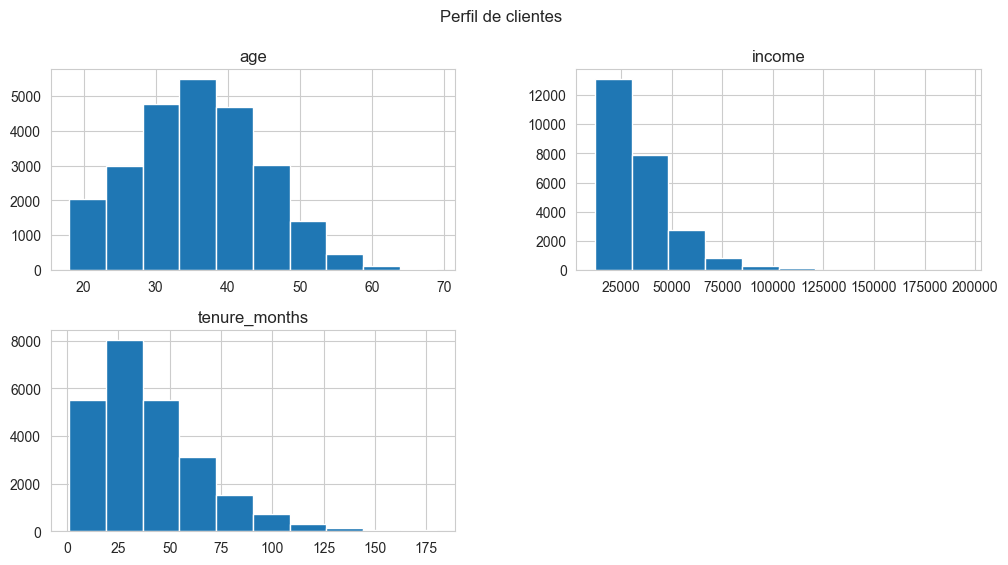

In [31]:
import matplotlib.pyplot as plt
profile_vars = ['age','income','tenure_months']

apps[profile_vars].hist(figsize=(12,6))
plt.suptitle('Perfil de clientes')
plt.show()

In [32]:
apps.groupby('region')['income'].mean()


region
C    33772.659789
N    33808.754522
S    33091.168230
Name: income, dtype: float64

In [33]:
apps.groupby('product')['amount'].mean()


product
AUTO    189629.600201
CC       26551.184744
PL       58713.190830
Name: amount, dtype: float64

### Análisis de Riesgo y Exposición
Evaluamos cómo se distribuyen los indicadores financieros y de buró entre los solicitantes.


En cuanto a la exposición, los montos solicitados suelen estar por debajo de los $100k, aunque hay una cola larga de solicitudes por montos mayores. El nivel de endeudamiento (`debt_income`) y el uso de líneas de crédito (`utilization`) se mantienen en niveles saludables para la mayoría, centrados alrededor del 35-40%.

Respecto al riesgo, los scores de buró siguen una distribución bastante normal centrada en 680 puntos, lo que sugiere una base de prospectos con historial crediticio sólido. La mayoría no presenta morosidad en los últimos 24 meses.




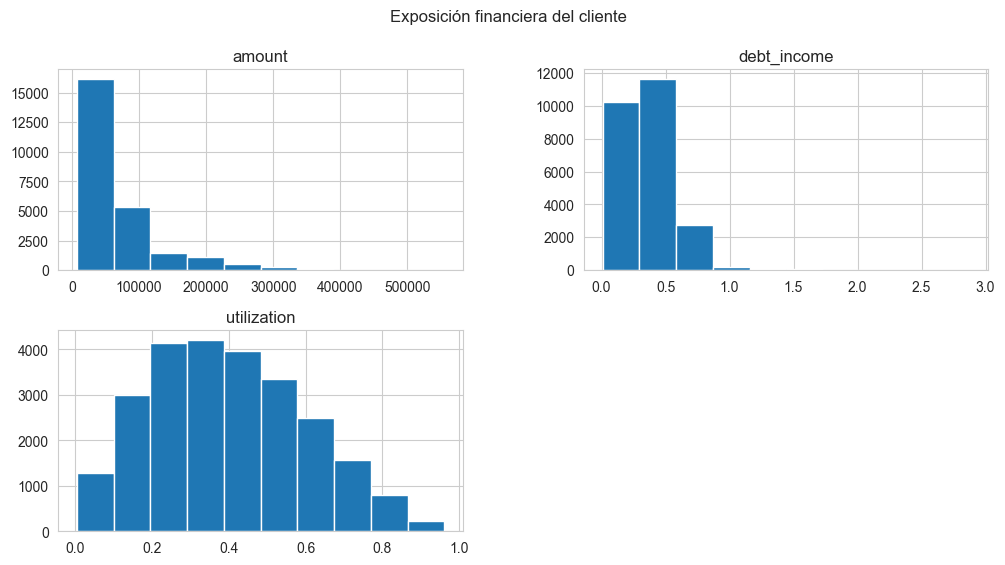

In [34]:
exposure_vars = ['amount','debt_income','utilization']

apps[exposure_vars].hist(figsize=(12,6))
plt.suptitle('Exposición financiera del cliente')
plt.show()

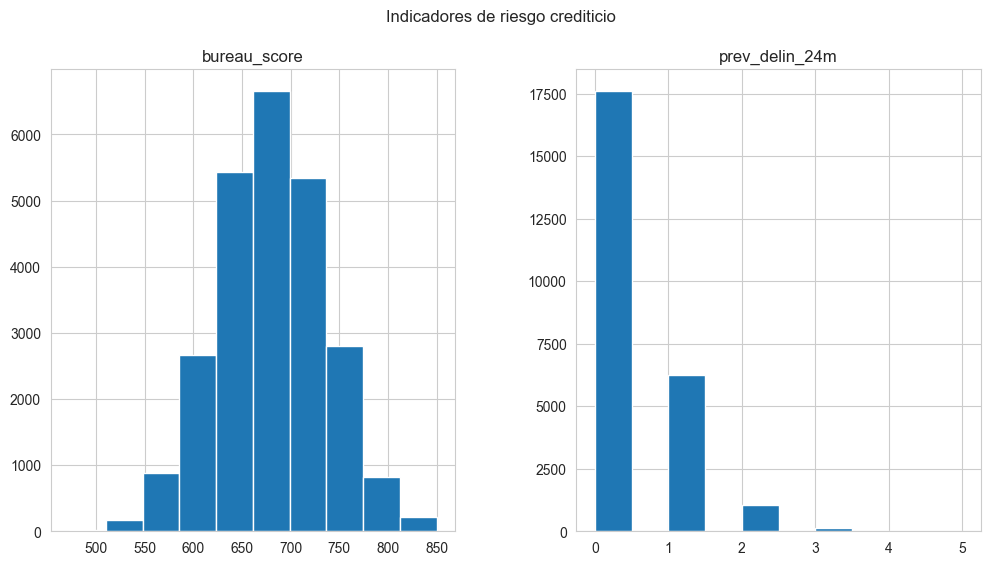

In [35]:
risk_vars = ['bureau_score','prev_delin_24m']

apps[risk_vars].hist(figsize=(12,6))
plt.suptitle('Indicadores de riesgo crediticio')
plt.show()


### Relaciones entre Variables
Exploramos correlaciones y comportamientos cruzados entre variables clave.


Al cruzar variables, notamos que el score crediticio es bastante consistente entre los diferentes productos (Auto, Tarjeta, Personal), aunque se observan algunos valores atípicos con scores bajos en préstamos personales. En cuanto al endeudamiento por canal, no hay una diferencia drástica, lo que indica que el perfil de riesgo es similar sin importar por dónde llegue el cliente.



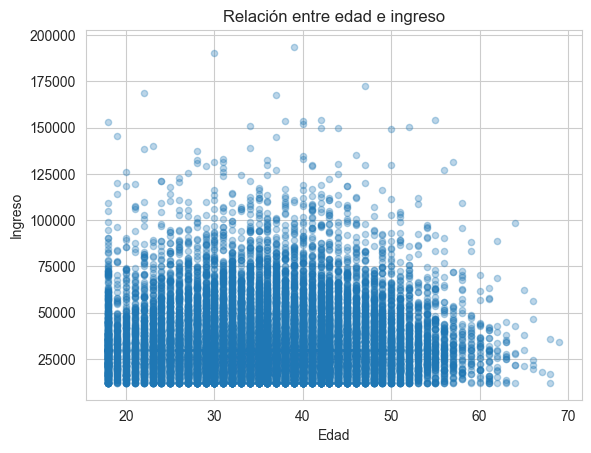

In [36]:
apps.plot.scatter(x='age', y='income', alpha=0.3)
plt.title('Relación entre edad e ingreso')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

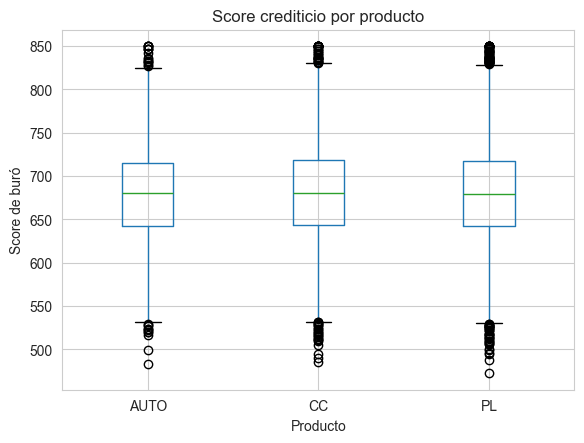

In [37]:
apps.boxplot(column='bureau_score', by='product')
plt.title('Score crediticio por producto')
plt.suptitle('')  # quita título automático feo
plt.xlabel('Producto')
plt.ylabel('Score de buró')
plt.show()



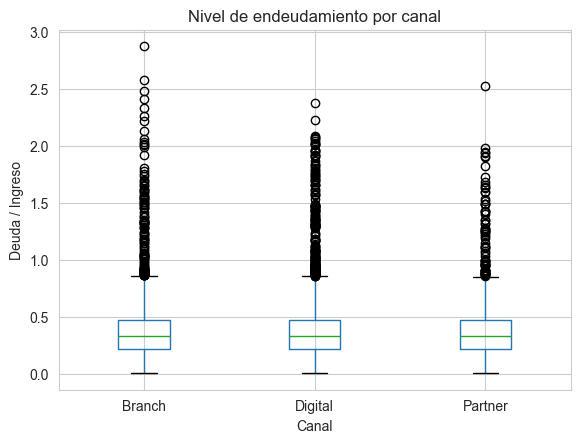

In [38]:
apps.boxplot(column='debt_income', by='channel')
plt.title('Nivel de endeudamiento por canal')
plt.suptitle('')
plt.xlabel('Canal')
plt.ylabel('Deuda / Ingreso')
plt.show()



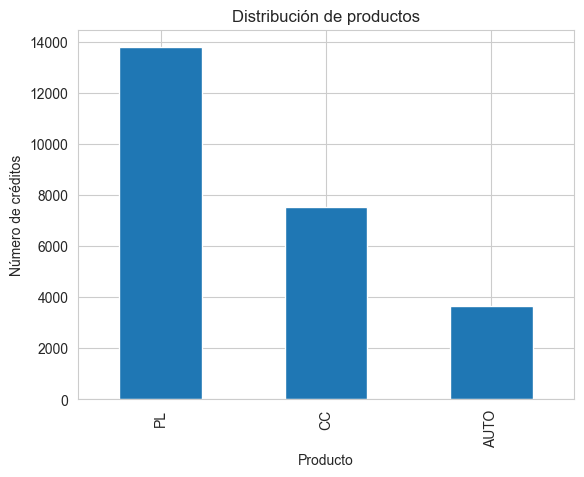

In [39]:
apps['product'].value_counts().plot(kind='bar')
plt.title('Distribución de productos')
plt.xlabel('Producto')
plt.ylabel('Número de créditos')
plt.show()



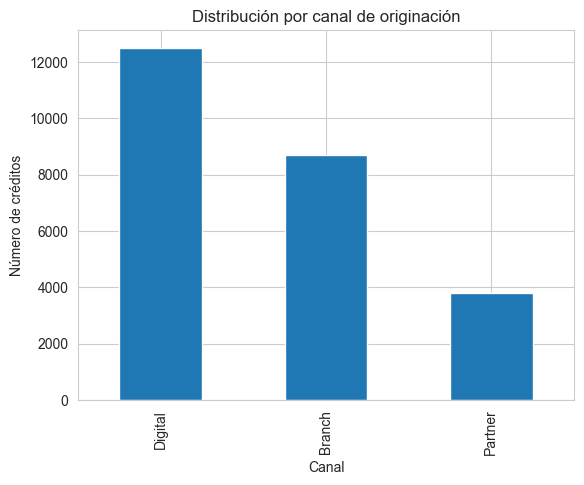

In [40]:
apps['channel'].value_counts().plot(kind='bar')
plt.title('Distribución por canal de originación')
plt.xlabel('Canal')
plt.ylabel('Número de créditos')
plt.show()


In [41]:
# macro.plot(figsize=(12,6))
# plt.title('Tendencias macroeconómicas en el tiempo')
# plt.xlabel('Mes de originación')
# plt.ylabel('Nivel')
# plt.show()



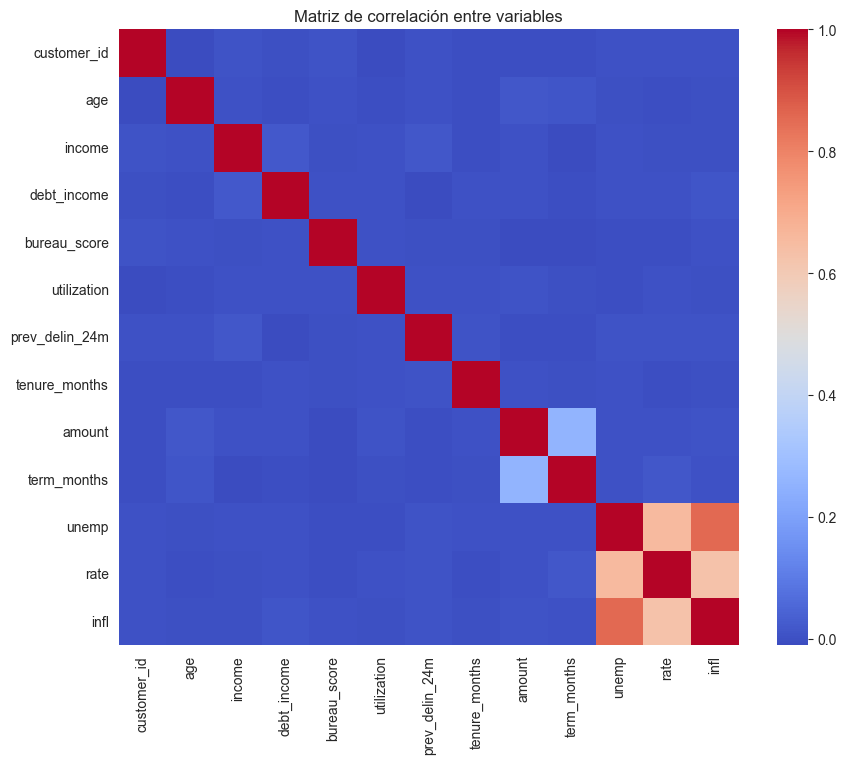

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(apps.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()



# Análisis de Desempeño (Performance)

Cargamos la información de comportamiento de pagos para definir nuestra variable objetivo (default).

In [43]:
perf = pd.read_csv('data/raw/performance.csv', parse_dates=['asof_month'])
perf.columns = perf.columns.str.strip().str.lower()

perf


,customer_id,mob,asof_month,dpd_bucket,default_flag
0,1,1,2025-01-05,C,0
1,1,2,2025-01-06,C,0
2,2,1,2024-01-04,C,0
3,2,2,2024-01-05,30,0
4,2,3,2024-01-06,C,0
...,...,...,...,...,...
401752,25000,3,2025-01-02,C,0
401753,25000,4,2025-01-03,C,0
401754,25000,5,2025-01-04,30,0
401755,25000,6,2025-01-05,30,0


In [44]:
perf_12m = perf[perf['mob'] <= 12]


In [45]:
default_12m = perf_12m.groupby('customer_id')['default_flag'].max()
default_12m


customer_id
1        0
2        0
3        1
4        0
5        0
        ..
24996    0
24997    0
24998    0
24999    0
25000    0
Name: default_flag, Length: 25000, dtype: int64

In [46]:
default_12m = default_12m.reset_index()
default_12m = default_12m.rename(columns={'default_flag': 'default_12m'})


# Integración y Preparación Final

Consolidamos la información de las solicitudes con el desempeño observado a 12 meses.

In [47]:

apps = apps.merge(default_12m, on='customer_id', how='left')
apps

,customer_id,orig_month,age,income,debt_income,bureau_score,utilization,prev_delin_24m,tenure_months,product,channel,region,amount,term_months,unemp,rate,infl,default_12m
0,1,2025-01-04,38,23422.33,0.6224,703.1,0.0894,0,35,PL,Partner,C,72728.28,18,4.495141,7.538432,4.619724,0
1,2,2024-01-03,34,103244.98,0.3936,691.9,0.1771,1,17,PL,Partner,C,45248.85,18,4.335648,7.375842,4.507775,0
2,3,2024-01-05,31,41568.33,0.5023,653.2,0.4781,0,68,AUTO,Digital,C,308801.45,12,4.661799,7.384582,4.868222,1
3,4,2025-01-02,21,16828.33,0.2190,642.4,0.6044,0,6,CC,Digital,C,26607.87,12,4.404924,7.608611,4.481929,0
4,5,2024-01-01,50,12633.20,0.1435,681.7,0.1931,0,40,PL,Digital,C,92093.10,18,3.984339,7.382953,4.249541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,2023-01-07,38,30300.98,0.2434,721.2,0.6266,1,3,CC,Partner,S,46228.76,12,4.336626,7.137931,4.360457,0
24996,24997,2025-01-06,52,42532.54,0.1715,577.6,0.8343,0,70,PL,Branch,C,23117.97,36,4.652507,7.532933,4.679545,0
24997,24998,2024-01-06,50,19879.46,0.4391,533.4,0.3975,0,15,PL,Digital,S,33748.71,24,4.718611,7.444711,4.886401,0
24998,24999,2023-01-12,28,73333.48,0.4367,652.5,0.5162,0,63,CC,Branch,C,25797.25,12,3.931778,7.323930,4.388643,0


In [48]:
apps['default_12m'] = apps['default_12m'].fillna(0)

In [49]:
apps['default_12m'].value_counts()


default_12m
0    23866
1     1134
Name: count, dtype: int64

In [50]:
apps['default_12m'].mean()


np.float64(0.04536)

In [51]:
apps.groupby('default_12m')[['income','debt_income','bureau_score','utilization']].mean()


,income,debt_income,bureau_score,utilization
default_12m,,,,
0,33687.117496,0.365968,681.215164,0.398364
1,32755.844718,0.392122,657.263933,0.419230


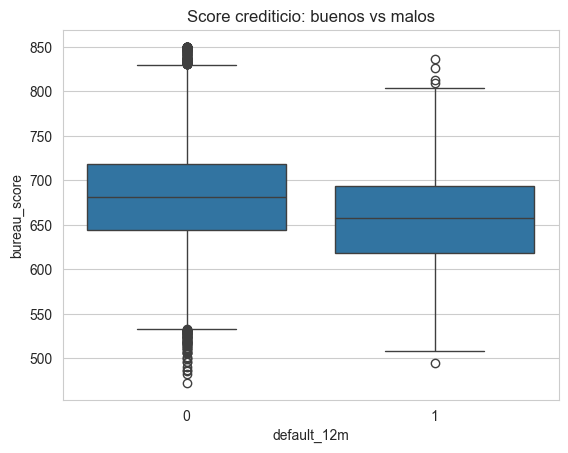

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=apps, x='default_12m', y='bureau_score')
plt.title('Score crediticio: buenos vs malos')
plt.show()


Como era de esperarse, existe una diferencia marcada en el score de buró entre quienes cumplen y quienes caen en impago. Los clientes que hicieron "default" tienden a tener scores significativamente más bajos, lo que confirma que el `bureau_score` será una variable predictiva clave en nuestro modelo.



In [53]:
apps.corr(numeric_only=True)['default_12m'].sort_values()


bureau_score     -0.090864
rate             -0.036278
term_months      -0.021404
unemp            -0.019133
infl             -0.015793
income           -0.011097
amount           -0.007281
age              -0.002880
tenure_months    -0.000080
customer_id       0.001725
utilization       0.021728
prev_delin_24m    0.024313
debt_income       0.025531
default_12m       1.000000
Name: default_12m, dtype: float64

In [54]:
ultima_fecha_perf = perf['asof_month'].max()
apps['months_since_orig'] = (ultima_fecha_perf - apps['orig_month']).dt.days / 30.44
apps_filtered = apps[apps['months_since_orig'] >= 12].copy()
apps_filtered = apps_filtered[apps_filtered['default_12m'].notna()].copy()
apps_filtered

,customer_id,orig_month,age,income,debt_income,bureau_score,utilization,prev_delin_24m,tenure_months,product,channel,region,amount,term_months,unemp,rate,infl,default_12m,months_since_orig
1,2,2024-01-03,34,103244.98,0.3936,691.9,0.1771,1,17,PL,Partner,C,45248.85,18,4.335648,7.375842,4.507775,0,12.155059
2,3,2024-01-05,31,41568.33,0.5023,653.2,0.4781,0,68,AUTO,Digital,C,308801.45,12,4.661799,7.384582,4.868222,1,12.089356
4,5,2024-01-01,50,12633.20,0.1435,681.7,0.1931,0,40,PL,Digital,C,92093.10,18,3.984339,7.382953,4.249541,0,12.220762
7,8,2022-01-10,29,24126.21,0.3842,603.6,0.2423,1,17,PL,Digital,N,84014.16,18,4.014470,6.908256,4.278983,0,35.906702
8,9,2022-01-03,21,34684.79,0.4979,702.9,0.0808,0,81,CC,Digital,C,22040.43,12,3.983684,6.886504,4.319146,0,36.136662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24993,2022-01-04,57,30805.18,0.3133,623.7,0.6330,0,82,PL,Digital,S,38923.00,12,3.904311,7.088503,4.285473,1,36.103811
24994,24995,2024-01-04,47,37852.79,0.2701,668.7,0.4662,0,50,PL,Digital,C,69841.34,18,4.534438,7.176895,4.608903,0,12.122208
24995,24996,2023-01-07,38,30300.98,0.2434,721.2,0.6266,1,3,CC,Partner,S,46228.76,12,4.336626,7.137931,4.360457,0,24.014455
24997,24998,2024-01-06,50,19879.46,0.4391,533.4,0.3975,0,15,PL,Digital,S,33748.71,24,4.718611,7.444711,4.886401,0,12.056505


### Creación de Variables Dummy y Exportación
Transformamos las variables categóricas en numéricas y guardamos el dataset final para la etapa de modelado.

In [55]:
apps_model = pd.get_dummies(apps_filtered, columns=['product','channel','region'], drop_first=True)
dummy_cols = apps_model.select_dtypes(include='bool').columns
apps_model[dummy_cols] = apps_model[dummy_cols].astype(int)

apps_model

,customer_id,orig_month,age,income,debt_income,bureau_score,utilization,prev_delin_24m,tenure_months,amount,...,rate,infl,default_12m,months_since_orig,product_CC,product_PL,channel_Digital,channel_Partner,region_N,region_S
1,2,2024-01-03,34,103244.98,0.3936,691.9,0.1771,1,17,45248.85,...,7.375842,4.507775,0,12.155059,0,1,0,1,0,0
2,3,2024-01-05,31,41568.33,0.5023,653.2,0.4781,0,68,308801.45,...,7.384582,4.868222,1,12.089356,0,0,1,0,0,0
4,5,2024-01-01,50,12633.20,0.1435,681.7,0.1931,0,40,92093.10,...,7.382953,4.249541,0,12.220762,0,1,1,0,0,0
7,8,2022-01-10,29,24126.21,0.3842,603.6,0.2423,1,17,84014.16,...,6.908256,4.278983,0,35.906702,0,1,1,0,1,0
8,9,2022-01-03,21,34684.79,0.4979,702.9,0.0808,0,81,22040.43,...,6.886504,4.319146,0,36.136662,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24993,2022-01-04,57,30805.18,0.3133,623.7,0.6330,0,82,38923.00,...,7.088503,4.285473,1,36.103811,0,1,1,0,0,1
24994,24995,2024-01-04,47,37852.79,0.2701,668.7,0.4662,0,50,69841.34,...,7.176895,4.608903,0,12.122208,0,1,1,0,0,0
24995,24996,2023-01-07,38,30300.98,0.2434,721.2,0.6266,1,3,46228.76,...,7.137931,4.360457,0,24.014455,1,0,0,1,0,1
24997,24998,2024-01-06,50,19879.46,0.4391,533.4,0.3975,0,15,33748.71,...,7.444711,4.886401,0,12.056505,0,1,1,0,0,1


In [56]:
apps_model.to_csv("data/clean/apps_model_filtered.csv", index=False)

In [ ]:
# ============================================
# MODELADO CON DATOS LIMPIOS
# ============================================
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DATOS LIMPIOS
apps_model = pd.read_csv('data/clean/apps_model_filtered.csv', parse_dates=['orig_month'])

print("=" * 60)
print("DATOS LIMPIOS CARGADOS")
print("=" * 60)
print(f"Total registros: {len(apps_model)}")
print(f"Default rate: {apps_model['default_12m'].mean():.2%}")

# ============================================
# SPLIT TEMPORAL
# ============================================
apps_sorted = apps_model.sort_values('orig_month')
cutoff = apps_sorted['orig_month'].quantile(0.8)

train = apps_sorted[apps_sorted['orig_month'] <= cutoff]
test = apps_sorted[apps_sorted['orig_month'] > cutoff]

print(f"\nTRAIN: {len(train):,} registros | Default: {train['default_12m'].mean():.2%}")
print(f"TEST:  {len(test):,} registros | Default: {test['default_12m'].mean():.2%}")

# Features (excluye columnas auxiliares)
exclude_cols = ['customer_id', 'orig_month', 'default_12m', 'months_since_orig', 'orig_year_month']
features = [col for col in apps_sorted.columns if col not in exclude_cols]

X_train = train[features]
y_train = train['default_12m']
X_test = test[features]
y_test = test['default_12m']

print(f"\nFeatures utilizadas: {len(features)}")

# Calcula ratio de desbalance
ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Ratio de desbalance: {ratio:.2f}")

# ============================================
# MODELO 1: XGBoost sin balance (baseline)
# ============================================
print(f"\n{'=' * 60}")
print("MODELO 1: XGBoost SIN ajuste de desbalance (baseline)")
print("=" * 60)

xgb_baseline = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='auc'
)

xgb_baseline.fit(X_train, y_train)
y_pred_baseline = xgb_baseline.predict_proba(X_test)[:, 1]
auc_baseline = roc_auc_score(y_test, y_pred_baseline)

print(f"AUC (sin balance): {auc_baseline:.4f}")

# ============================================
# MODELO 2: XGBoost CON scale_pos_weight
# ============================================
print(f"\n{'=' * 60}")
print("MODELO 2: XGBoost CON scale_pos_weight")
print("=" * 60)

xgb_balanced = xgb.XGBClassifier(
    scale_pos_weight=ratio,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    eval_metric='auc'
)

xgb_balanced.fit(X_train, y_train)
y_pred_balanced = xgb_balanced.predict_proba(X_test)[:, 1]
auc_balanced = roc_auc_score(y_test, y_pred_balanced)

print(f"AUC (con balance): {auc_balanced:.4f}")
print(f"Mejora vs baseline: +{((auc_balanced / auc_baseline - 1) * 100):.2f}%")

# ============================================
# MODELO 3: XGBoost CON SMOTE
# ============================================
print(f"\n{'=' * 60}")
print("MODELO 3: XGBoost CON SMOTE")
print("=" * 60)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Train original: {len(y_train)} | Defaults: {y_train.sum()}")
print(f"Train SMOTE:    {len(y_train_smote)} | Defaults: {y_train_smote.sum()}")
print(f"Balance después de SMOTE: {y_train_smote.mean():.1%}")

xgb_smote = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    random_state=42,
    eval_metric='auc'
)

xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)

print(f"AUC (SMOTE): {auc_smote:.4f}")

# ============================================
# MODELO 4: Random Forest Balanceado
# ============================================
print(f"\n{'=' * 60}")
print("MODELO 4: Random Forest CON class_weight")
print("=" * 60)

rf_balanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_balanced.fit(X_train, y_train)
y_pred_rf = rf_balanced.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"AUC (Random Forest): {auc_rf:.4f}")
print(f"Mejora vs baseline: +{((auc_rf / auc_baseline - 1) * 100):.2f}%")

# ============================================
# MODELO 5: Regresión Logística Balanceada
# ============================================
print(f"\n{'=' * 60}")
print("MODELO 5: Regresión Logística (7 vars)")
print("=" * 60)

good_vars = [
    'bureau_score', 'debt_income', 'income', 'infl',
    'prev_delin_24m', 'rate', 'utilization'
]

X_train_red = X_train[good_vars]
X_test_red = X_test[good_vars]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_red)
X_test_scaled = scaler.transform(X_test_red)

logit_balanced = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

logit_balanced.fit(X_train_scaled, y_train)
y_pred_logit = logit_balanced.predict_proba(X_test_scaled)[:, 1]
auc_logit = roc_auc_score(y_test, y_pred_logit)

print(f"AUC (Logit balanced): {auc_logit:.4f}")

# ============================================
# COMPARACIÓN DE MODELOS
# ============================================
print(f"\n{'=' * 60}")
print("RESUMEN COMPARATIVO")
print("=" * 60)

resultados = pd.DataFrame({
    'Modelo': [
        'XGBoost Baseline',
        'XGBoost Balanced',
        'XGBoost SMOTE',
        'Random Forest Balanced',
        'Logit Balanced (7v)'
    ],
    'AUC': [auc_baseline, auc_balanced, auc_smote, auc_rf, auc_logit]
}).sort_values('AUC', ascending=False)

resultados['Mejora vs Baseline'] = ((resultados['AUC'] / auc_baseline - 1) * 100).round(2)

print(resultados.to_string(index=False))

# ============================================
# VISUALIZACIÓN COMPLETA
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. ROC Curves
for name, y_pred, color in [
    ('XGB Baseline', y_pred_baseline, 'gray'),
    ('XGB Balanced', y_pred_balanced, 'blue'),
    ('XGB SMOTE', y_pred_smote, 'green'),
    ('Random Forest', y_pred_rf, 'purple'),
    ('Logit Balanced', y_pred_logit, 'orange')
]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_val = roc_auc_score(y_test, y_pred)
    axes[0, 0].plot(fpr, tpr, label=f'{name} ({auc_val:.3f})', color=color, linewidth=2)

axes[0, 0].plot([0, 1], [0, 1], '--', color='red', label='Random (0.500)')
axes[0, 0].set_xlabel('False Positive Rate', fontsize=11)
axes[0, 0].set_ylabel('True Positive Rate', fontsize=11)
axes[0, 0].set_title('ROC Curves Comparison', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(alpha=0.3)

# 2. Feature Importance XGBoost (mejor modelo)
best_xgb = xgb_balanced if auc_balanced >= auc_smote else xgb_smote
importance_df_xgb = pd.DataFrame({
    'feature': features,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[0, 1].barh(importance_df_xgb['feature'], importance_df_xgb['importance'], color='teal')
axes[0, 1].set_xlabel('Importance', fontsize=11)
axes[0, 1].set_title('Top 15 Features (XGBoost)', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()

# 3. Feature Importance Random Forest
importance_df_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[0, 2].barh(importance_df_rf['feature'], importance_df_rf['importance'], color='purple')
axes[0, 2].set_xlabel('Importance', fontsize=11)
axes[0, 2].set_title('Top 15 Features (Random Forest)', fontsize=12, fontweight='bold')
axes[0, 2].invert_yaxis()

# 4. Precision-Recall Curve (mejor modelo general)
from sklearn.metrics import precision_recall_curve, average_precision_score

# Encuentra el mejor modelo
all_aucs = {
    'XGB Balanced': (auc_balanced, y_pred_balanced),
    'XGB SMOTE': (auc_smote, y_pred_smote),
    'Random Forest': (auc_rf, y_pred_rf)
}
best_model_name, (best_auc, best_pred) = max(all_aucs.items(), key=lambda x: x[1][0])

precision, recall, _ = precision_recall_curve(y_test, best_pred)
ap_score = average_precision_score(y_test, best_pred)

axes[1, 0].plot(recall, precision, color='purple', linewidth=2)
axes[1, 0].set_xlabel('Recall', fontsize=11)
axes[1, 0].set_ylabel('Precision', fontsize=11)
axes[1, 0].set_title(f'Precision-Recall Curve\n{best_model_name} (AP={ap_score:.3f})', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 5. Distribución de scores
axes[1, 1].hist(best_pred[y_test == 0], bins=50, alpha=0.5, label='No Default', color='blue', density=True)
axes[1, 1].hist(best_pred[y_test == 1], bins=50, alpha=0.5, label='Default', color='red', density=True)
axes[1, 1].set_xlabel('Predicted Probability', fontsize=11)
axes[1, 1].set_ylabel('Density', fontsize=11)
axes[1, 1].set_title(f'Score Distribution by Class\n{best_model_name}', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 6. Comparación de AUC (barplot)
auc_comparison = pd.DataFrame({
    'Modelo': ['XGB\nBaseline', 'XGB\nBalanced', 'XGB\nSMOTE', 'Random\nForest', 'Logit\n(7v)'],
    'AUC': [auc_baseline, auc_balanced, auc_smote, auc_rf, auc_logit]
}).sort_values('AUC', ascending=True)

colors_bar = ['gray', 'blue', 'green', 'purple', 'orange']
axes[1, 2].barh(auc_comparison['Modelo'], auc_comparison['AUC'], color=colors_bar)
axes[1, 2].set_xlabel('AUC', fontsize=11)
axes[1, 2].set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 2].axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Random')
axes[1, 2].grid(alpha=0.3, axis='x')

for i, (modelo, auc_val) in enumerate(zip(auc_comparison['Modelo'], auc_comparison['AUC'])):
    axes[1, 2].text(auc_val + 0.005, i, f'{auc_val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison_with_rf.png', dpi=300, bbox_inches='tight')
print("\n📊 Gráfico guardado como 'model_comparison_with_rf.png'")
plt.show()

# ============================================
# ANÁLISIS DETALLADO DEL MEJOR MODELO
# ============================================
print(f"\n{'=' * 60}")
print(f"ANÁLISIS DETALLADO - MEJOR MODELO")
print("=" * 60)

print(f"Modelo seleccionado: {best_model_name}")
print(f"AUC: {best_auc:.4f}")

# Encuentra mejor threshold
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, best_pred)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nMejor threshold (max F1): {best_threshold:.3f}")
print(f"F1-Score en ese threshold: {f1_scores[best_idx]:.3f}")
print(f"Precision: {precision[best_idx]:.3f}")
print(f"Recall: {recall[best_idx]:.3f}")

# Confusion Matrix
y_pred_class = (best_pred >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_class)

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class, target_names=['No Default', 'Default']))

# Matriz visual
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.savefig('confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
print("📊 Matriz de confusión guardada como 'confusion_matrix_best_model.png'")
plt.show()

print("\n🎉 ¡Análisis completo!")